In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set directory
os.chdir(r"C:\Users\Roswita Hede\Documents\Practice\Python\Customer Churn Prediction Project")

In [3]:
df=pd.read_csv('train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Data Preparation and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Exploratory Data Analysis

In [5]:
df['state'].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [6]:

# grouping numerical variables
# Identify the numerical variables
numerical_variables = []
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_variables.append(column)

print(numerical_variables)


['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [7]:
#choose numerical variable
numerical_columns = df.select_dtypes(exclude=object)

Churn: 598 14.07 %
Not Churn: 3652 85.93 %


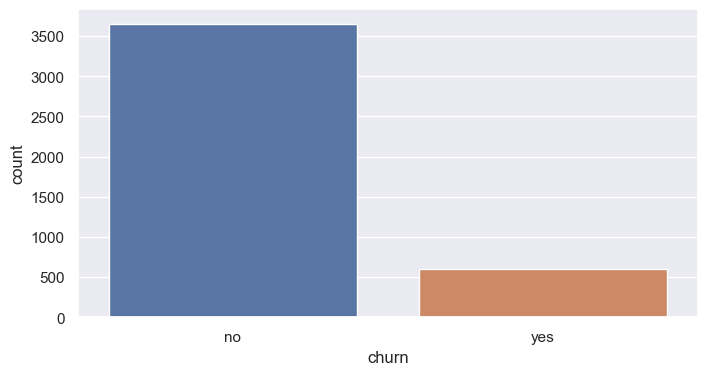

In [8]:
#distribution of class
# Distribution of classes
sns.set(rc={"figure.figsize":(8,4)})
sns.countplot(x='churn', data=df)
churn_counts = df.groupby('churn').churn.count()
print('Churn:',churn_counts['yes'],round(churn_counts['yes']/df.shape[0]*100,2),'%')
print('Not Churn:',churn_counts['no'],round(churn_counts['no']/df.shape[0]*100,2),'%')

Based on the data distribution above, more than 85% customer will retain and use the provider. In addition, it can be seen the class is imbalnce between the two classes. Therefore, before applying the algorithm, I will handle the class imbalance.

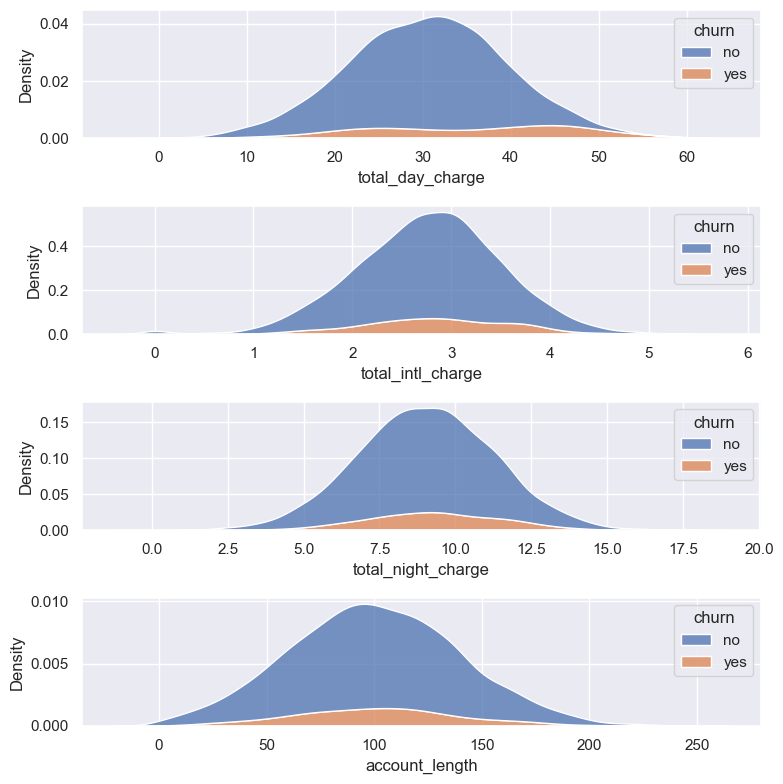

In [9]:
# Create a subplot with 3 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(8, 8))
# Create a histogram of total_day_charge by churn status in the first subplot
sns.kdeplot(df, x="total_day_charge", hue="churn",  multiple="stack",ax=axes[0])
# Create a histogram of total_intl_charge by churn status in the second subplot
sns.kdeplot(df, x="total_intl_charge", hue="churn", multiple="stack",ax=axes[1])
# Create a histogram of total_night_charge by churn status in the third subplot
sns.kdeplot(df, x="total_night_charge", hue="churn", multiple="stack", ax=axes[2])
# Create a histogram of account_length by churn status in the third subplot
sns.kdeplot(df, x="account_length", hue="churn", multiple="stack", ax=axes[3])

# Adjust the subplot layout
fig.tight_layout()

# Display the plot
plt.show()


Based on the plot above, we can conclude that customers with higher charges are less likely to churn.

In [10]:

categ_columns=df[[ 'area_code', 'international_plan', 'voice_mail_plan']]

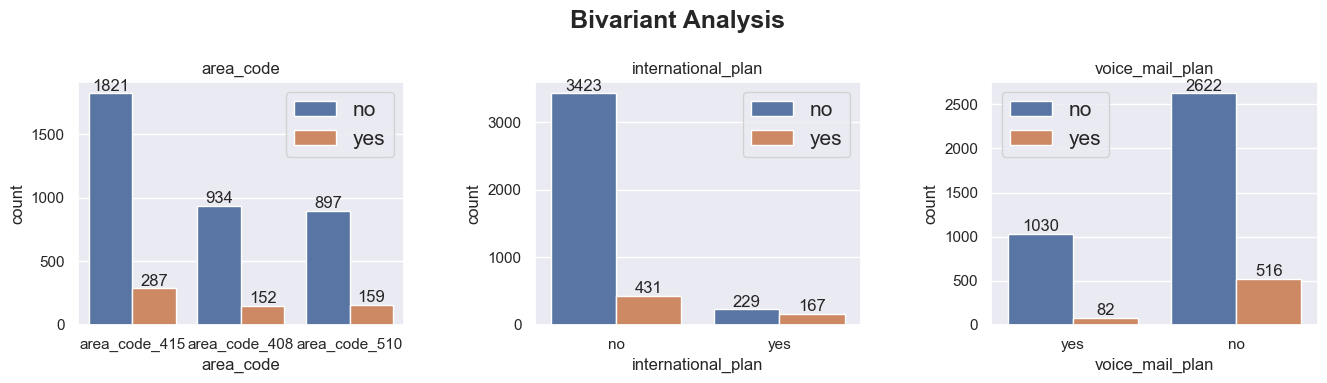

In [11]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col )
    a.bar_label(a.containers[0] ) 
    a.bar_label(a.containers[1] )
    a.legend(fontsize=15)

The plot above shows that people with area code 415 have a higher churn rate than people with the other two area codes. his could be due to a number of factors, such as the higher cost of living in the San Francisco Bay Area, the greater availability of alternatives to the company's service. Additionally, there is a small difference in churn rate between customers with and without an international plan. This could be due to a number of factors, such as the higher cost of living in the San Francisco Bay Area, the greater availability of alternatives to the company's service, or the fact that the company's service is not well-suited to the needs of customers in this area. so the company may want to focus more on this type of plan. Finally, people without a voicemail plan are more likely to churn than people with a voicemail plan.

**Checking Null Values**

In [12]:
# check missing value
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Based on the information above, there is no null values in the dataset

**Checking Duplicate Varibles**

In [13]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


Based on the information above, there is no duplicate values in the dataset

In [14]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Checking Outlier**
In this project, I used a boxplot to identify outliers and then used the Winsorizer method to handle them.

In [15]:
def outlier_analyse(dataf):
    iqr_data = []
    l_limit = []
    u_limit = []
    outlier_d = []
    outlier_per = []
    for i in dataf.columns:
        IQR = dataf[str(i)].quantile(0.75) - dataf[str(i)].quantile(0.25)
        iqr_data.append(IQR)
        lower_limit = dataf[str(i)].quantile(0.25) - (1.5 * IQR)
        l_limit.append(lower_limit)
        upper_limit = dataf[str(i)].quantile(0.75) + (1.5 * IQR)
        u_limit.append(upper_limit)
        outlier = ((dataf[str(i)] < lower_limit ) | (dataf[str(i)] > upper_limit)).sum()
        outlier_d.append(outlier)
        outlier_p = round(((outlier*100)/(dataf[str(i)].count())),2)
        outlier_per.append(outlier_p)

        outlier_data = {'Feature': dataf.columns,'IQR' : iqr_data, 'Lower_Limit' : l_limit,'Upper_Limit': u_limit,
                    'Outlier_Count' : outlier_d, 'Outlier_Percent' : outlier_per}
    outlier_data = pd.DataFrame(outlier_data)
    return(outlier_data)

In [16]:

num_outliers = outlier_analyse(numerical_columns)
num_outliers

,Feature,IQR,Lower_Limit,Upper_Limit,Outlier_Count,Outlier_Percent
0,account_length,54.0000,-8.00000,208.00000,20,0.47
1,number_vmail_messages,16.0000,-24.00000,40.00000,86,2.02
2,total_day_minutes,72.8750,34.01250,325.51250,25,0.59
3,total_day_calls,26.0000,48.00000,152.00000,28,0.66
4,total_day_charge,12.3850,5.78750,55.32750,26,0.61
5,total_eve_minutes,67.8500,64.15000,335.55000,34,0.80
6,total_eve_calls,27.0000,46.50000,154.50000,24,0.56
7,total_eve_charge,5.7650,5.45500,28.51500,34,0.80
8,total_night_minutes,67.4750,66.01250,335.91250,37,0.87
9,total_night_calls,27.0000,45.50000,153.50000,33,0.78


Variable number_customer_service_calls have the highest outlier

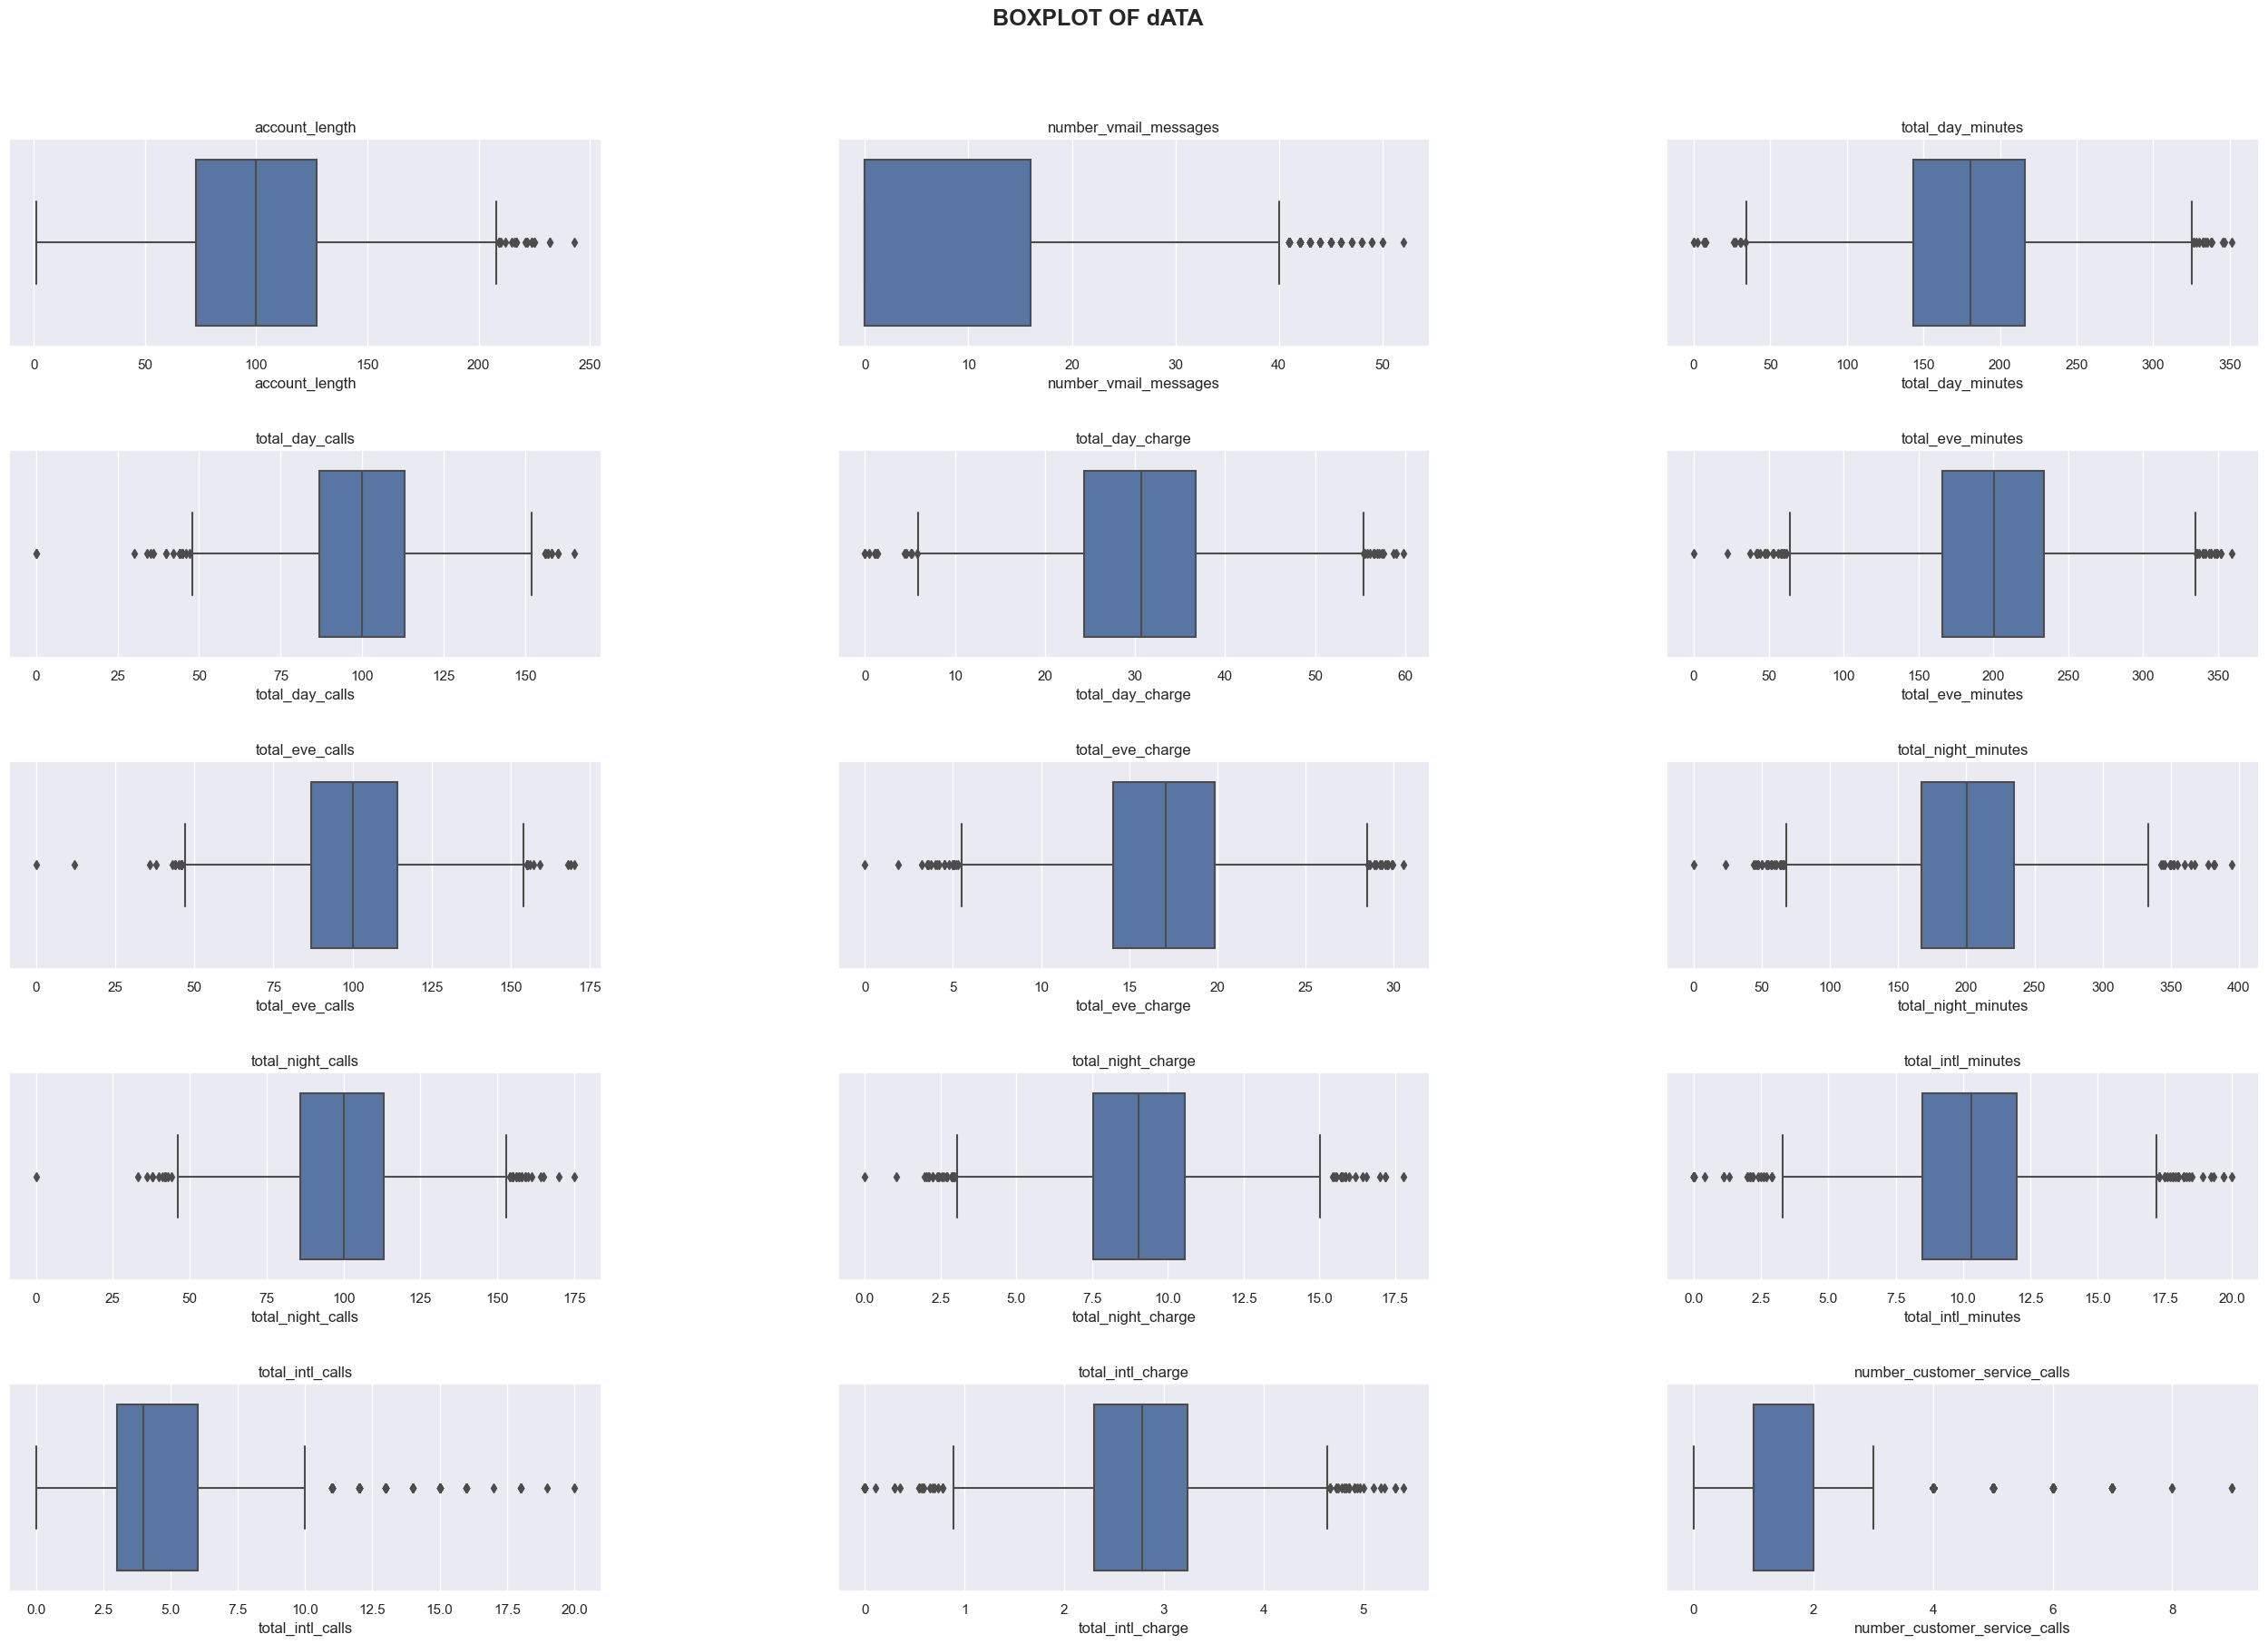

In [17]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_variables):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col );
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

**Handling outlier using winsorizer method**

In [18]:
from feature_engine.outliers import Winsorizer

In [19]:

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables =numerical_variables)

In [20]:
df = winsor.fit_transform(df)

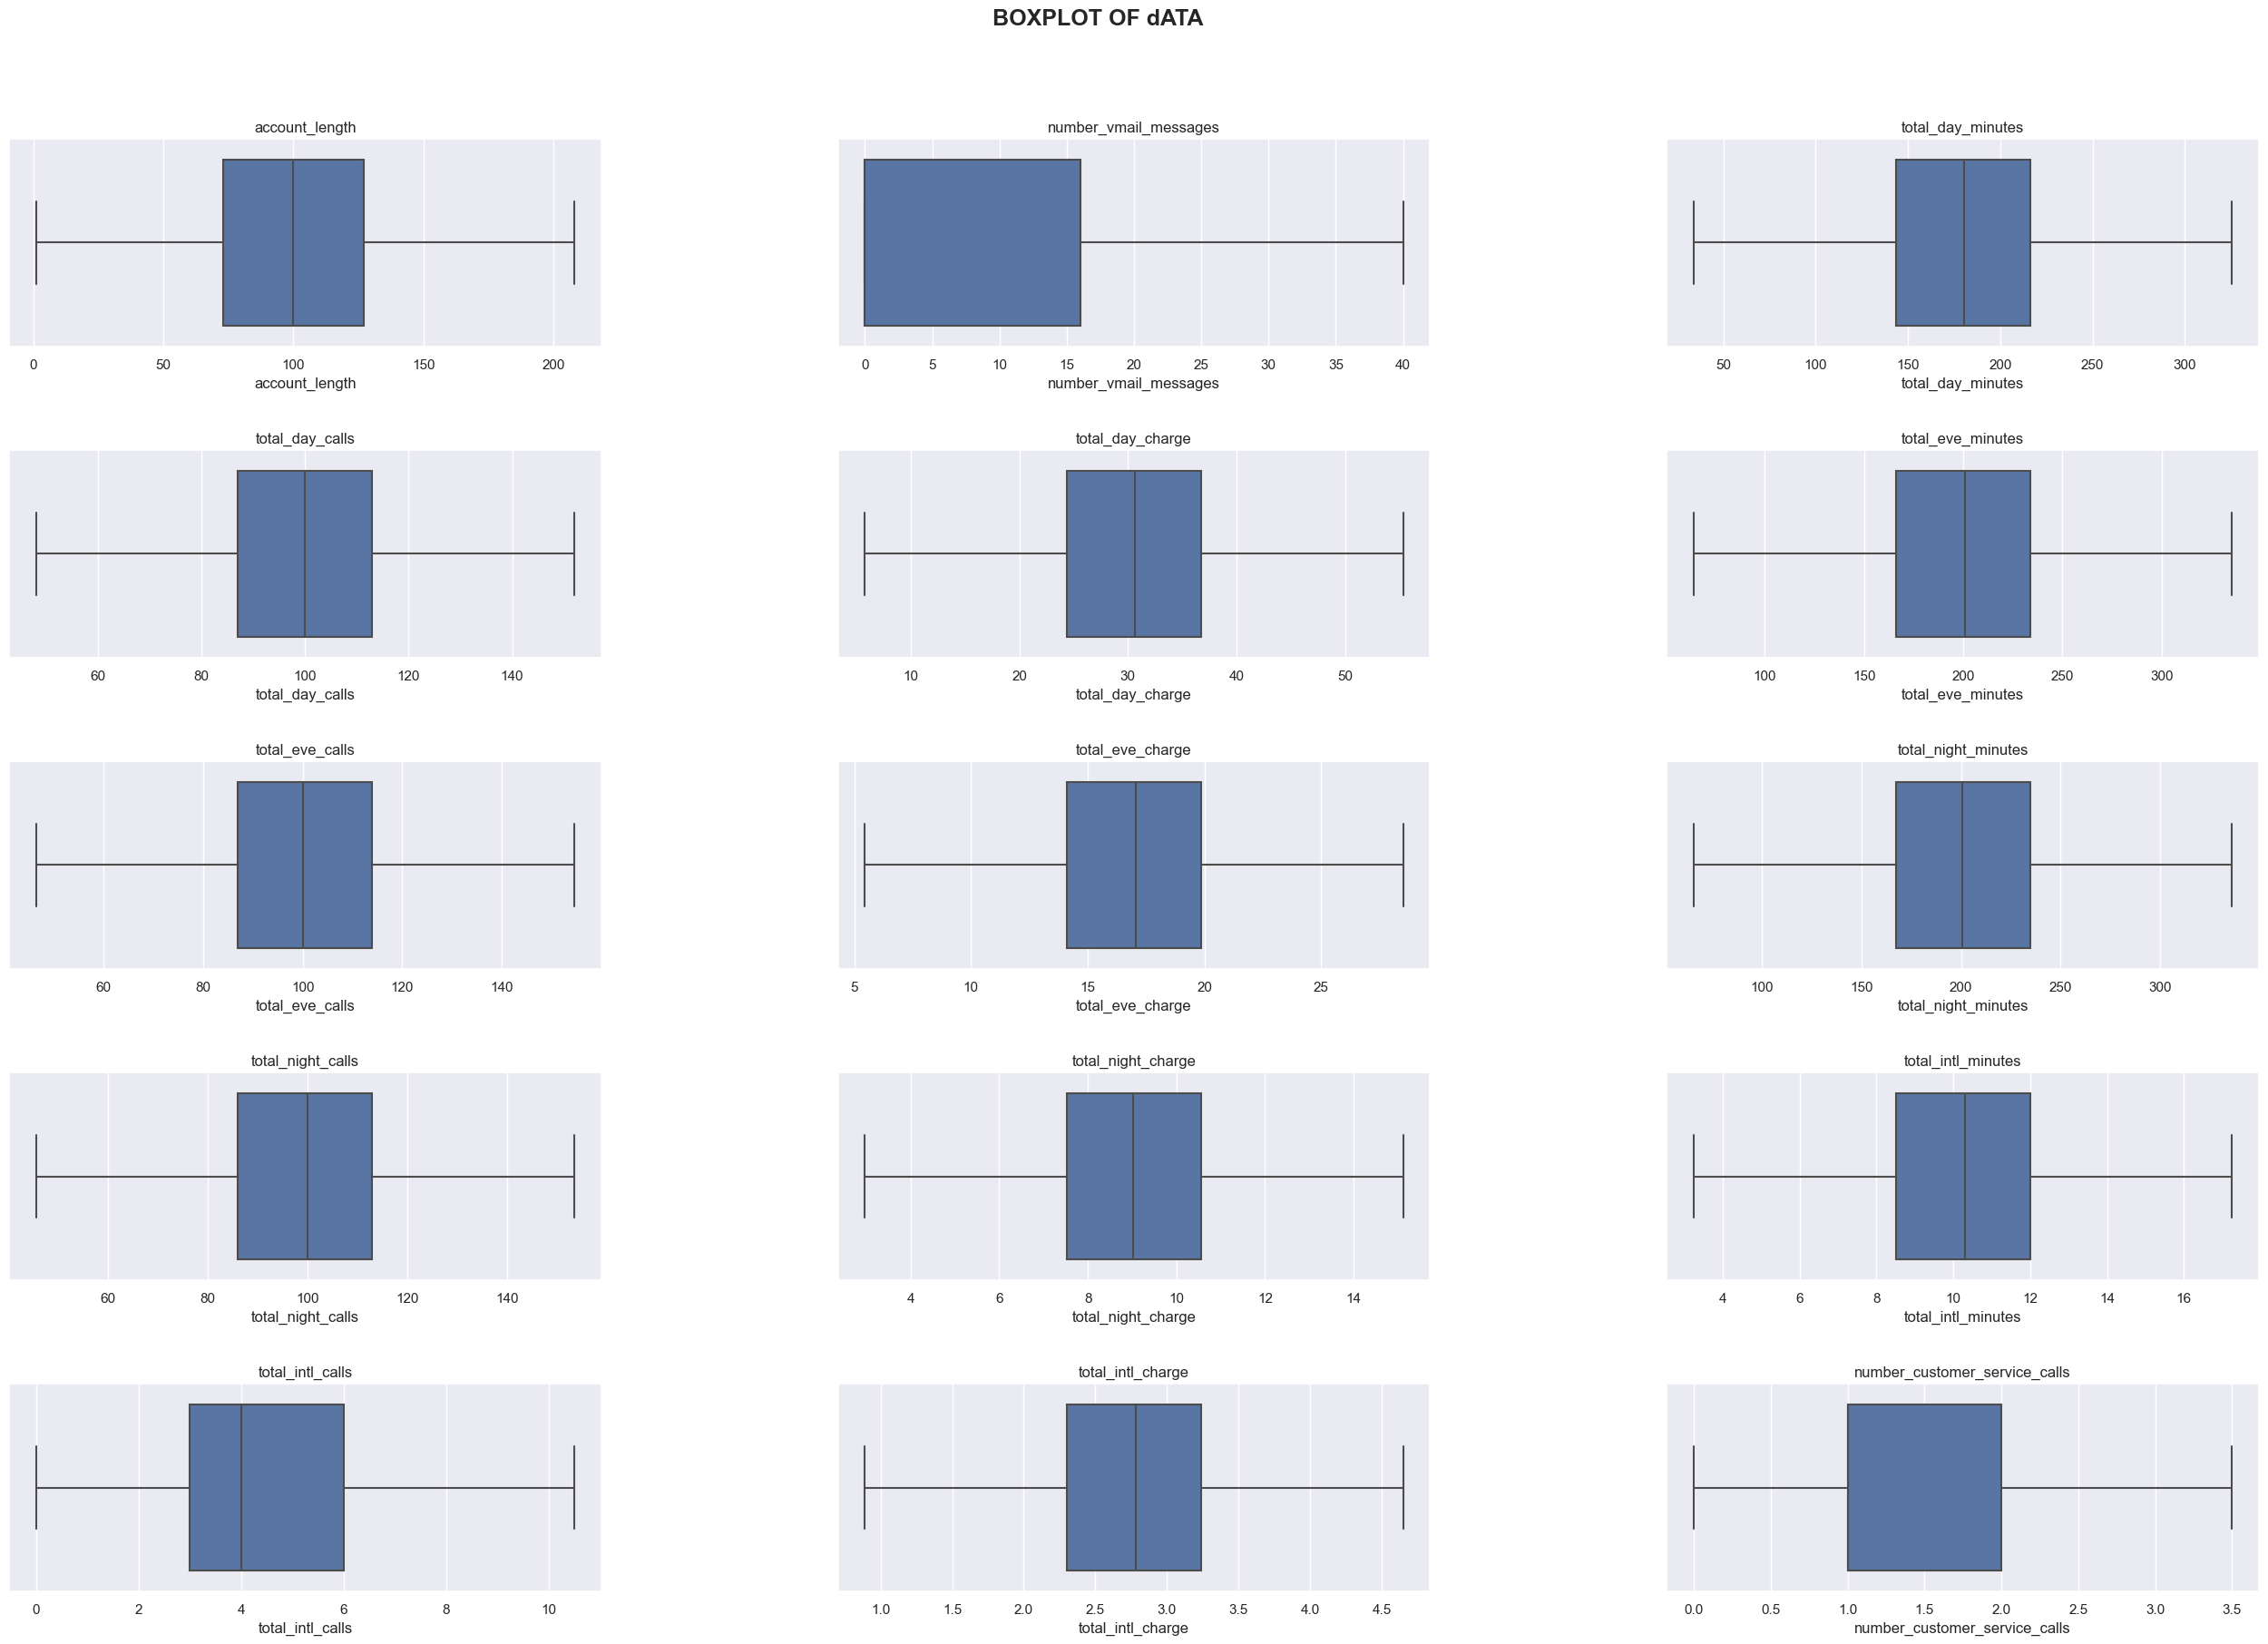

In [21]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_variables):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col );
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

Based on the boxplot above, there is no outliers anymore

**Correlation Analysis**

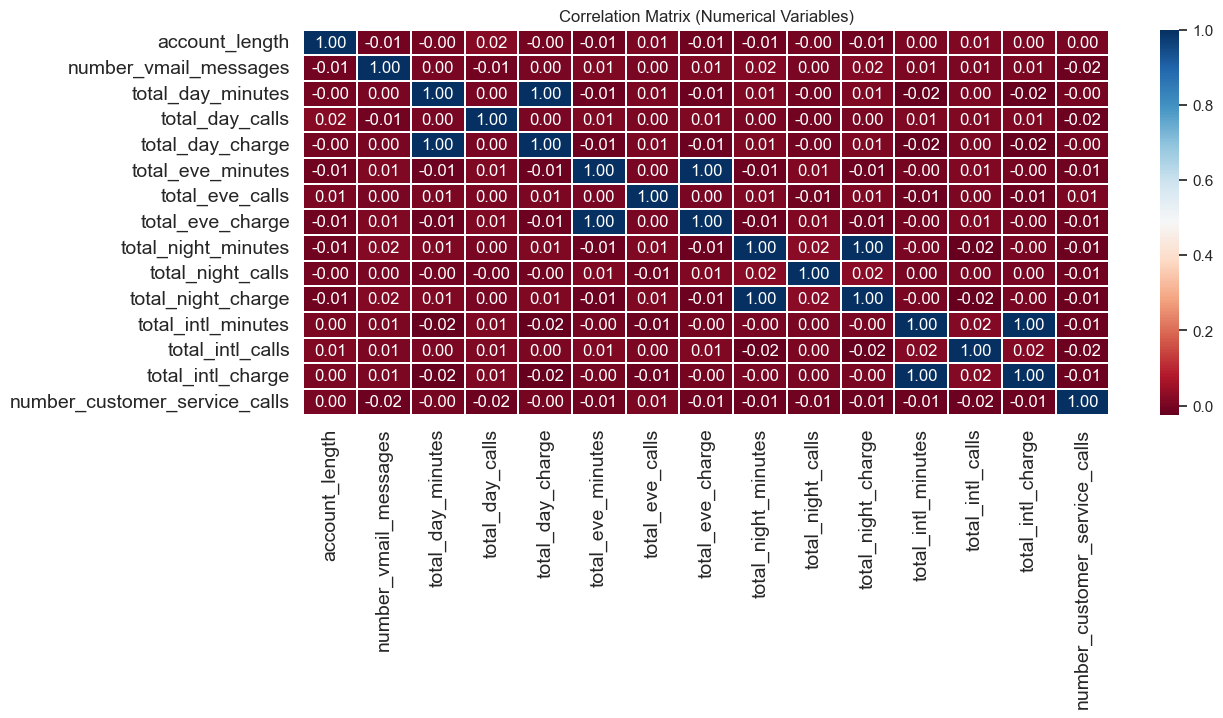

In [22]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(numerical_columns.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Correlation Matrix (Numerical Variables)')
fig.show() 

In [23]:
data=df[[ 'area_code', 'international_plan', 'voice_mail_plan']]
data.head()

,area_code,international_plan,voice_mail_plan
0,area_code_415,no,yes
1,area_code_415,no,no
2,area_code_408,yes,no
3,area_code_415,yes,no
4,area_code_510,no,yes


In [24]:

import scipy.stats as stats
data=df[[ 'area_code', 'international_plan', 'voice_mail_plan']]

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for all pairs of categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            correlation = cramers_v(data[col1], data[col2])
            correlation_matrix.at[col1, col2] = correlation

print("Cramer's V Correlation Matrix:")
print(correlation_matrix)


Cramer's V Correlation Matrix:
                   area_code international_plan voice_mail_plan
area_code                NaN           0.018634             0.0
international_plan  0.018634                NaN             0.0
voice_mail_plan          0.0                0.0             NaN


We used Pearson's correlation to measure the correlation between numerical variables and Cramer's V to measure the correlation between categorical variables. The correlation between all variables was small, so we decided to keep all of them in the analysis.

**Feature Enineering**

In this step, I will perform feature engineering by combining variables and using label encoding. 

In [25]:
# label encoding 
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 
df['area_code'] = df['area_code'].map({'area_code_415': 1, 'area_code_408': 2, 'area_code_510':3}) 

In [26]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [27]:
#drop variable 
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes','state'], inplace=True)

In [28]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,107,1,0,1,26,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,137,1,0,0,0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,84,2,1,0,0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,75,1,1,0,0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,121,3,0,1,24,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


# Predictive Modeling

The predictive modeling is build using machine learning:
1. Logistic Regression
2. Random Forest
3. XG Boost
4. Support Vector Machines

In [29]:
X=df.drop('churn',axis=1)
y=df['churn']

In [30]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X , y, shuffle = True, test_size=0.3, random_state=1)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (2975, 12)
X_test: (1275, 12)


**Handling Class Imbalance**

In [31]:
#Handling unlance data using SMOTE technique
sm = SMOTE(random_state=42)

In [32]:
#Performing SMOTE to hadle class imbalace o trainig sample
X_train, y_train = sm.fit_resample(X_train, y_train)

**Scalling**

In [33]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,0.512077,0.0,0.0,1.0,0.65,0.746429,0.285714,0.747340,0.285714,0.558916,0.643836,0.479223
1,0.657005,0.0,0.0,0.0,0.00,0.639286,0.476190,0.638298,0.000000,0.418813,0.639269,0.531745
2,0.400966,0.5,1.0,0.0,0.00,0.239286,0.666667,0.236702,0.571429,0.474073,0.273973,0.626086
3,0.357488,0.0,1.0,0.0,0.00,0.489286,0.285714,0.489362,0.857143,0.376766,0.767123,0.385412
4,0.579710,1.0,0.0,1.0,0.60,0.303571,0.666667,0.303191,0.857143,0.816271,0.575342,0.777276


**1. Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_lg_pred=logreg.predict(X_test)
print("train accuracy: {}".format(accuracy_score(y_train, logreg.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, logreg.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, y_lg_pred, pos_label=1, average='weighted')))


train accuracy: 0.7612436448963629
test accuracy: 0.7066666666666667
F1 Score : 0.7480974237488895


In order to improve the model's performace, we perform hyperparamter tunning

In [35]:
from sklearn.metrics import make_scorer
# Create a logistic regression classifier
LR = LogisticRegression(solver='liblinear')

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create an F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score, average='weighted')

# Create GridSearchCV object with F1 scoring
grid_search = GridSearchCV(LR, param_grid, scoring=f1_scorer, cv=12)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best F1 score on the training set
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (on Training Data):", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy of the best model: {test_accuracy}")
f1_test = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (on Test Data):", f1_test)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best F1 Score (on Training Data): 0.761714491481695
Test accuracy of the best model: 0.7082352941176471
F1 Score (on Test Data): 0.7495515494907186


In [36]:
#update model using best_estimator hyperparamter (C=1. penalty=l1)
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression(C=1, penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)
y_lg_pred=logreg.predict(X_test)
print("train accuracy: {}".format(accuracy_score(y_train, logreg.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, logreg.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, y_lg_pred, pos_label=1, average='weighted')))


train accuracy: 0.7626124364489636
test accuracy: 0.7082352941176471
F1 Score : 0.7495515494907186


AUC Score (on Test Data): 0.695509893455099


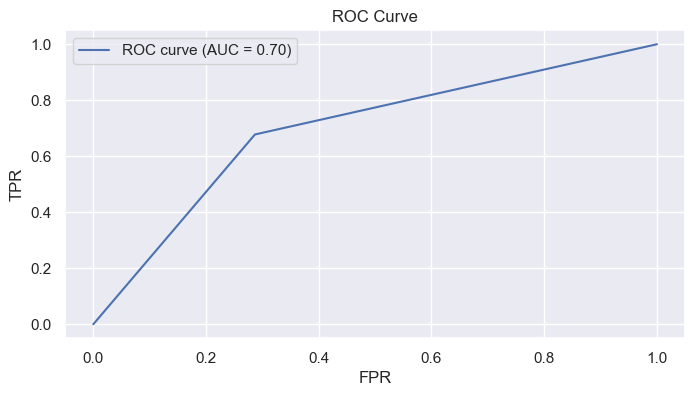

In [37]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def calculate_auc(y_true, y_pred):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    return auc_score

def plot_roc_curve(fpr, tpr, auc_score):


    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_lg_pred)

# Calculate the AUC
auc_score = calculate_auc(y_test, y_lg_pred)
print("AUC Score (on Test Data):", auc_score)
# Plot the ROC curve
plot_roc_curve(fpr, tpr, auc_score)


**2. Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
rf.score(X_test , y_test) 
print("train accuracy: {}".format(accuracy_score(y_train, rf.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, rf.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, y_rf_pred, pos_label=1, average='weighted')))

train accuracy: 1.0
test accuracy: 0.9686274509803922
F1 Score : 0.9679297348229909


In [39]:
#Random Forest with Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=25,stop=150,num=11)],
            'max_features':['log2','sqrt','none'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=50,num=11)],
            'max_leaf_nodes':[3,5,6,9,15]
           }
random_cv=RandomizedSearchCV(rf_c, param_grid, scoring=f1_scorer, cv=12)
random_cv.fit(X_train,y_train)
print(random_cv.best_estimator_) 


RandomForestClassifier(max_depth=22, max_leaf_nodes=15, n_estimators=150)


In [40]:
model_random = RandomForestClassifier(max_depth=26, 
									max_features='log2', 
									max_leaf_nodes=15, 
									n_estimators=125) 
model_random.fit(X_train, y_train) 
y_pred_rand = model_random.predict(X_test) 
print('F1 Score : {}'.format(f1_score(y_test, y_pred_rand, pos_label=1, average='weighted')))

F1 Score : 0.9396776943213707


AUC Score (on Test Data): 0.9144216133942161


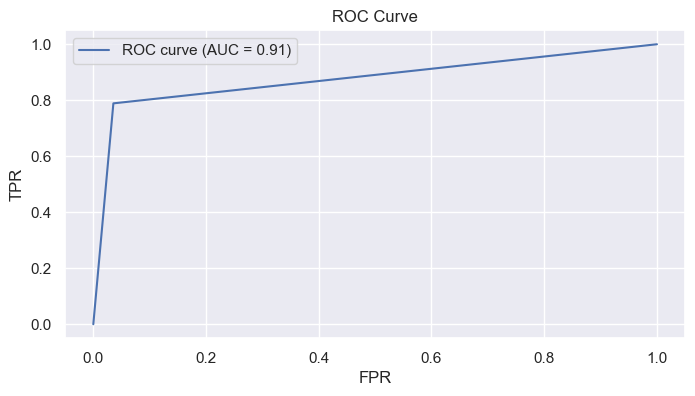

In [41]:
# Calculate the AUC score
# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rand)

# Calculate the AUC
auc_score = calculate_auc(y_test, y_rf_pred)
print("AUC Score (on Test Data):", auc_score)
# Plot the ROC curve
plot_roc_curve(fpr, tpr, auc_score)


**3. XG Boost**

In [42]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print("train accuracy: {}".format(accuracy_score(y_train, xgb_model.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, xgb_model.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, prediction_xgb, pos_label=1, average='weighted')))

train accuracy: 0.9998044583496285
test accuracy: 0.9756862745098039
F1 Score : 0.9751773892287191


In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [3, 4, 5],                  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],     # Fraction of features used for fitting the trees
    'gamma': [0, 1, 2]                       # Minimum loss reduction required to make a further partition
}

# Create the XGBoost classifier
xgb_classifier = XGBClassifier(booster='gbtree', random_state=42)

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
print("Test AUC Score:", test_auc)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best AUC Score: 0.9909990214067423
Test AUC Score: 0.9305936073059361


In [44]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(colsample_bytree= 0.8, gamma= 0, learning_rate=0.2, max_depth= 5, n_estimators=200, subsample= 0.8)
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print("train accuracy: {}".format(accuracy_score(y_train, xgb_model.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, xgb_model.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, prediction_xgb, pos_label=1, average='weighted')))

train accuracy: 1.0
test accuracy: 0.9749019607843137
F1 Score : 0.9743437878583928


AUC Score (on Test Data): 0.9273592085235921


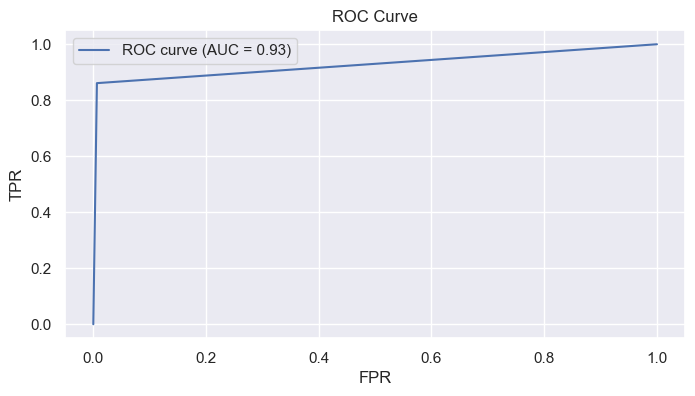

In [45]:
# Calculate the AUC score
# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, prediction_xgb)

# Calculate the AUC
auc_score = calculate_auc(y_test, prediction_xgb)
print("AUC Score (on Test Data):", auc_score)
# Plot the ROC curve
plot_roc_curve(fpr, tpr, auc_score)

**4. Support Vector Machines**

In [46]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_svm_pred = svm.predict(X_test)
print("train accuracy: {}".format(accuracy_score(y_train, svm.predict(X_train))))
print("test accuracy: {}".format(accuracy_score(y_test, svm.predict(X_test))))
print('F1 Score : {}'.format(f1_score(y_test, y_svm_pred, pos_label=1, average='weighted')))

train accuracy: 0.7690653109112241
test accuracy: 0.6988235294117647
F1 Score : 0.7424582230123966


AUC Score (on Test Data): 0.6993150684931506


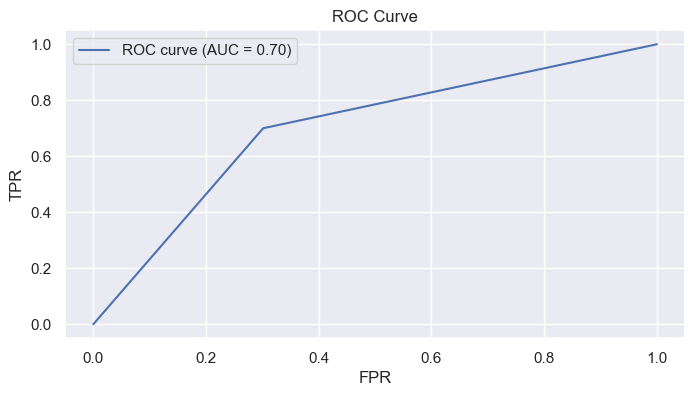

In [47]:
# Calculate the AUC score
# Calculate the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_svm_pred)

# Calculate the AUC
auc_score = calculate_auc(y_test, y_svm_pred)
print("AUC Score (on Test Data):", auc_score)
# Plot the ROC curve
plot_roc_curve(fpr, tpr, auc_score)

# Model Evaluation
Since the class is imblance, we will evaluate the model's performance using F1 score and AUC score since they are robust to class imbalance and noise in data

In [48]:
model_list = ['Logistic Regression', 'Random Forest', 'XG Boost','Support Vector Machine']
accuracy_list = [0.71, 0.97, 0.97, 0.70]
f1_score_list= [0.75, 0.93, 0.97, 0.74] 
AUC_score_list = [0.70, 0.91, 0.93, 0.69]

In [49]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'f1_score':f1_score_list , 'AUC_score':AUC_score_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,f1_score,AUC_score
1,Random Forest,0.97,0.94,0.92
2,XG Boost,0.97,0.97,0.93
0,Logistic Regression,0.71,0.75,0.70
3,Support Vector Machine,0.70,0.74,0.69


Based on the comparison of performance metric above it can be seen that XG boost model is the best model since it has the highest f1 score and AUC score

# Bias-Variance Trade off

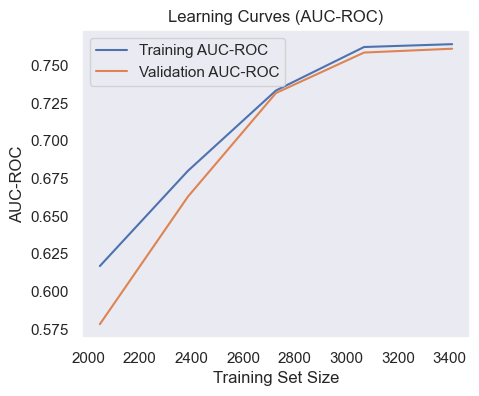

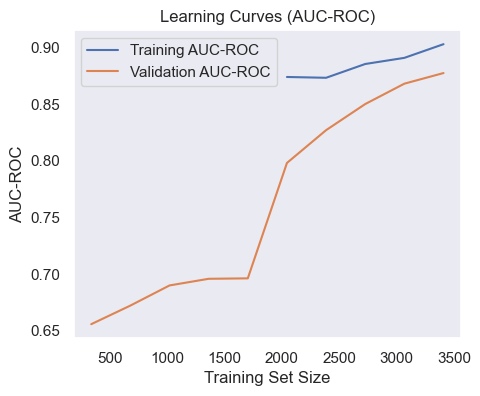

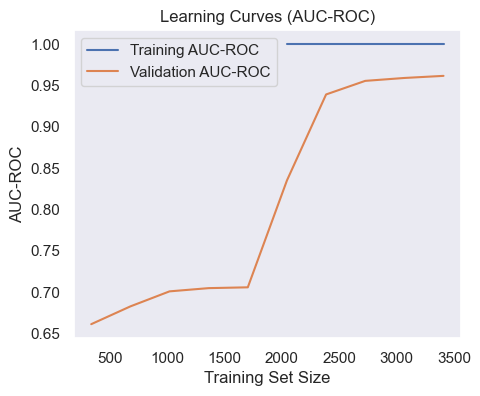

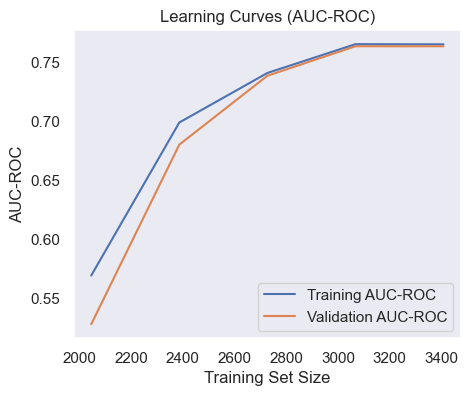

In [56]:
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import learning_curve
def plot_learning_curve_auc(estimator, X, y, cv, scoring):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(5, 4))
    plt.plot(train_sizes, train_scores_mean, label='Training AUC-ROC')
    plt.plot(train_sizes, val_scores_mean, label='Validation AUC-ROC')
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC-ROC')
    plt.title('Learning Curves (AUC-ROC)')
    plt.legend()
    plt.grid()
    plt.show()
plot_learning_curve_auc(LogisticRegression(C=1, penalty='l1',solver='liblinear'),  X_train, y_train,cv=3, scoring=make_scorer(roc_auc_score))
plot_learning_curve_auc(RandomForestClassifier(max_depth=26, max_features='log2',max_leaf_nodes=15, n_estimators=125), X_train, y_train, cv=3,scoring=make_scorer(roc_auc_score))
plot_learning_curve_auc(XGBClassifier(colsample_bytree= 0.8, gamma= 0, learning_rate=0.2, max_depth= 5, n_estimators=200, subsample= 0.8), X_train, y_train, cv=3,scoring=make_scorer(roc_auc_score))
plot_learning_curve_auc(SVC(kernel='linear', probability=True), X_train, y_train, cv=3,scoring=make_scorer(roc_auc_score))

Based on the plot above, the Logistic Regression and Support Vector Machines models do not show any signs of overfitting or underfitting because they have low variance and low bias. This means that they are able to learn the training data well without overfitting, and they are also able to generalize to unseen data.

The other models in the plot show signs of overfitting, which means that they are learning the training data too well and are not able to generalize to unseen data.

Based on the model evaluation and the bias-variance trade-off, the Support Vector Machine model is the best choice for training the new dataset. This is because it has the best balance between bias and variance.

# Churn Prediction on The New Dataset

In [57]:
from sklearn import model_selection
import joblib

In [58]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(svm, filename)

['finalized_model.sav']

In [59]:
# load the model from disk
loaded_model = joblib.load('finalized_model.sav')

In [60]:
# Save the trained model to a file using joblib
joblib.dump(svm, 'trained_model.joblib')

# Load the trained model from the file
loaded_model = joblib.load('trained_model.joblib')

# Load your new dataset without the target value
df_test = pd.read_csv('test.csv')


Performing Data Cleaning and preparation for new test data

In [61]:
# check missing value
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [62]:
duplicate = df_test[df.duplicated()]
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


In [63]:
# grouping numerical variables
# Identify the numerical variables
numerical_variables = []
for column in df_test.columns:
    if pd.api.types.is_numeric_dtype(df_test[column]):
        numerical_variables.append(column)

print(numerical_variables)

['id', 'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [64]:
#choose numerical variable
numerical_columns_test = df_test.select_dtypes(exclude=object)

In [65]:
def outlier_analyse(dataf):
    iqr_data = []
    l_limit = []
    u_limit = []
    outlier_d = []
    outlier_per = []
    for i in dataf.columns:
        IQR = dataf[str(i)].quantile(0.75) - dataf[str(i)].quantile(0.25)
        iqr_data.append(IQR)
        lower_limit = dataf[str(i)].quantile(0.25) - (1.5 * IQR)
        l_limit.append(lower_limit)
        upper_limit = dataf[str(i)].quantile(0.75) + (1.5 * IQR)
        u_limit.append(upper_limit)
        outlier = ((dataf[str(i)] < lower_limit ) | (dataf[str(i)] > upper_limit)).sum()
        outlier_d.append(outlier)
        outlier_p = round(((outlier*100)/(dataf[str(i)].count())),2)
        outlier_per.append(outlier_p)

        outlier_data = {'Feature': dataf.columns,'IQR' : iqr_data, 'Lower_Limit' : l_limit,'Upper_Limit': u_limit,
                    'Outlier_Count' : outlier_d, 'Outlier_Percent' : outlier_per}
    outlier_data = pd.DataFrame(outlier_data)
    return(outlier_data)

In [66]:
num_outliers_test = outlier_analyse(numerical_columns_test)
num_outliers_test

,Feature,IQR,Lower_Limit,Upper_Limit,Outlier_Count,Outlier_Percent
0,id,374.5000,-373.50000,1124.50000,0,0.00
1,account_length,52.0000,-4.00000,204.00000,6,0.80
2,number_vmail_messages,21.0000,-31.50000,52.50000,0,0.00
3,total_day_minutes,69.3500,42.60000,320.00000,9,1.20
4,total_day_calls,26.0000,49.00000,153.00000,7,0.93
5,total_day_charge,11.7900,7.24000,54.40000,9,1.20
6,total_eve_minutes,69.1750,63.03750,339.73750,8,1.07
7,total_eve_calls,26.0000,48.00000,152.00000,5,0.67
8,total_eve_charge,5.8800,5.35750,28.87750,8,1.07
9,total_night_minutes,70.3250,58.98750,340.28750,3,0.40


In [67]:
df_test = winsor.fit_transform(df_test)

In [68]:
# label encoding 
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df_test['international_plan'] = df_test['international_plan'].map({'yes': 1, 'no': 0}) 
df_test['area_code'] = df_test['area_code'].map({'area_code_415': 1, 'area_code_408': 2, 'area_code_510':3}) 

In [69]:
df_test['total_net_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
df_test['total_net_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_net_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']

In [70]:
#drop variable 
df_test.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes','state','id'], inplace=True)

**Churn Prediction on the new test data using SVM as best model**

In [71]:
# Make predictions on the new dataset
predictions = loaded_model.predict(df_test)

# Add the predictions to the new dataset as a new column
df_test['predicted_class'] = predictions

# Now, new_data contains the predictions as a new column ('predicted_class')
# You can save the updated dataset with predictions to a new CSV file if needed
df_test.to_csv('new_dataset_with_predictions.csv', index=False)

In [72]:
#distribution of class of the new dataset after prediction
df_pred = pd.read_csv('new_dataset_with_predictions.csv')
df_pred['predicted_class']=df_pred['predicted_class'].astype(str)
df_pred.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,predicted_class
0,128,1,0,1,25,10.0,3.0,2.70,1.0,707.2,300.0,72.86,0
1,118,3,1,0,0,6.3,6.0,1.70,0.0,647.9,317.0,65.91,0
2,62,1,0,0,0,13.1,6.0,3.54,3.5,630.9,245.0,55.77,1
3,93,3,0,0,0,8.1,3.0,2.19,3.0,538.5,346.0,56.80,1
4,174,1,0,0,0,15.5,5.0,4.19,3.0,652.1,303.0,55.96,1


Churn: 281 37.47 %
Not Churn: 469 62.53 %


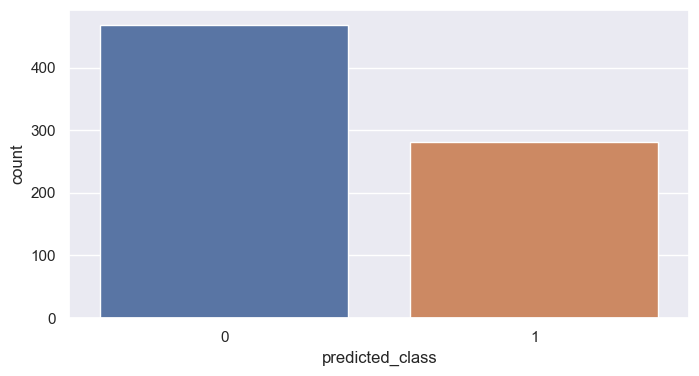

In [73]:
#distribution of class

sns.set(rc={"figure.figsize": (8, 4)})
sns.countplot(x='predicted_class', data=df_pred)
churn_counts = df_pred.groupby('predicted_class').size()
print('Churn:', churn_counts['1'], round(churn_counts['1'] / df_pred.shape[0] * 100, 2), '%')
print('Not Churn:', churn_counts['0'], round(churn_counts['0'] / df_pred.shape[0] * 100, 2), '%')